# Business Case OLA - Ensemble Learning

**Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

- Demographics (city, age, gender etc.)
-  information (joining date, Last Date)
- Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [136]:
import warnings
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv('ola_driver_scaler.csv')
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [3]:
df.shape

(19104, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


## Converting features to respective data-types

In [78]:
df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

In [79]:
# Drop irrelevant column
df.drop('Unnamed: 0', axis=1, inplace=True)

### Missing values and Preparing data for KNN imputation 

In [6]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

## KNN Imputation

In [80]:
num_col = df.select_dtypes(np.number)

In [81]:
from sklearn.impute import KNNImputer

Imputation = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
Imputation.fit(num_col)
df_new = Imputation.transform(num_col)

In [82]:
df_new = pd.DataFrame(df_new)
df_new.columns = num_col.columns

In [83]:
df_new.isnull().sum()

Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

Successfully imputed the missing values using KNNImputer

### Concatenate dataframes

In [120]:
res = list(set(df.columns).difference(set(num_col)))

data  = pd.concat([df_new, df[res]], axis =1)
data.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,month,MMM-YY,year,LastWorkingDate,City,Dateofjoining
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,12,2019-01-01,2018,NaT,C23,2018-12-24
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,12,2019-02-01,2018,NaT,C23,2018-12-24
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,12,2019-03-01,2018,2019-03-11,C23,2018-12-24
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,11,2020-11-01,2020,NaT,C7,2020-11-06
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,11,2020-12-01,2020,NaT,C7,2020-11-06


In [121]:
agg_functions = data.groupby(["Driver_ID"]).aggregate({
    "Age": "max",
    "Gender": "first",
    "Education_Level": "last",
    "Income": "last",
    "Joining Designation": "last",
    "Grade": "last",
    "Total Business Value": "sum",
    "Quarterly Rating": "last",
    "LastWorkingDate": "last",
    "City": "first",
    "Dateofjoining": "last"
})
final_data = pd.DataFrame()
final_data["Driver_ID"] = data["Driver_ID"].unique()

In [122]:
final_data['Age'] = agg_functions.groupby('Driver_ID')['Age'].max().tolist()
final_data['Gender'] = agg_functions.groupby('Driver_ID')['Gender'].last().tolist()
final_data['City'] = agg_functions.groupby('Driver_ID')['City'].last().tolist()
final_data['Education'] = agg_functions.groupby('Driver_ID')['Education_Level'].last().tolist()
final_data['Income'] = agg_functions.groupby('Driver_ID')['Income'].last().tolist()
final_data['Joining_Designation'] = agg_functions.groupby('Driver_ID')['Joining Designation'].last().tolist()
final_data['Grade'] = agg_functions.groupby('Driver_ID')['Grade'].last().tolist()
final_data['Total_Business_Value'] = agg_functions.groupby('Driver_ID')['Total Business Value'].sum().tolist()
final_data['Last_Quarterly_Rating'] = agg_functions.groupby('Driver_ID')['Quarterly Rating'].last().tolist()

In [123]:
final_data.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1.0,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0
1,2.0,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0
2,4.0,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0
3,5.0,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0
4,6.0,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0


## Feature Engineering

**whether the quarterly rating has increased for that driver -for those whose quarterly rating has increased we assign the value 1**

In [124]:
def qrt_rat_inc(rating):
    if len(rating) >= 2:
        return int(rating.iloc[-1] > rating.iloc[-2])
    else:
        return 0

Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].apply(qrt_rat_inc).reset_index(name='Quarterly_Rating_increased')

final_data = pd.merge(left=final_data,
                right=Quarterly_Rating_increased,
                on="Driver_ID",
                how="outer")

final_data['Quarterly_Rating_increased'].value_counts()

0    2365
1      16
Name: Quarterly_Rating_increased, dtype: int64

In [125]:
final_data.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_increased
0,1.0,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0
1,2.0,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0
2,4.0,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0
3,5.0,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0
4,6.0,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,0


**Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1**

In [126]:
lwd = (agg_functions.groupby(["Driver_ID"]).agg({"LastWorkingDate": "last"})["LastWorkingDate"].isna()).reset_index()

lwrid = lwd[lwd["LastWorkingDate"] == True]["Driver_ID"]
target = []

for i in final_data["Driver_ID"]:
    if i in lwrid.values:
        target.append(0)
    else:
        target.append(1)
        
final_data["target"] = target
final_data['target'].value_counts()

1    1616
0     765
Name: target, dtype: int64

**Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1**

In [127]:
def inc_income(inc):
    if len(inc) >= 2:
        return int(inc.iloc[-1] > inc.iloc[-2])
    else:
        return 0

Increased_income = df.groupby("Driver_ID")["Income"].apply(inc_income).reset_index(name='Increased_income')

final_data = pd.merge(left=final_data,
                right=Increased_income,
                on="Driver_ID",
                how="outer")

final_data['Increased_income'].value_counts()

0    2370
1      11
Name: Increased_income, dtype: int64

In [128]:
final_data.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_increased,target,Increased_income
0,1.0,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1,0
1,2.0,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0
2,4.0,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1,0
3,5.0,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1,0
4,6.0,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,0,0,0


## Statistical Summary

In [129]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.377026e+01,5.932235e+00,21.0,30.0,33.0,37.0,58.0
Gender,2381.0,4.110038e-01,4.916751e-01,0.0,0.0,0.0,1.0,1.0
Education,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Joining_Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total_Business_Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Last_Quarterly_Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.0,1.0,2.0,4.0
Quarterly_Rating_increased,2381.0,6.719866e-03,8.171605e-02,0.0,0.0,0.0,0.0,1.0


- The 'Driver_ID' column shows an unique count 2381.
- The average age of drivers is around 33 years, with a minimum age of 21 years and a maximum age of 58 years.
- The average income of drivers is approximately 59,334, with a wide range from 10,747 to 188,418.
- The 'Total_Business_Value' column has a significant range, with values ranging from negative to extremely high positive values, suggesting variations in business performance among drivers.

In [130]:
final_data["Education"].value_counts()

2.0    802
1.0    795
0.0    784
Name: Education, dtype: int64

Most drivers have obtained their degree.

In [131]:
final_data["target"].value_counts()

1    1616
0     765
Name: target, dtype: int64

1616 out of 2381 drivers have departed from the company.

## Univariate Analysis

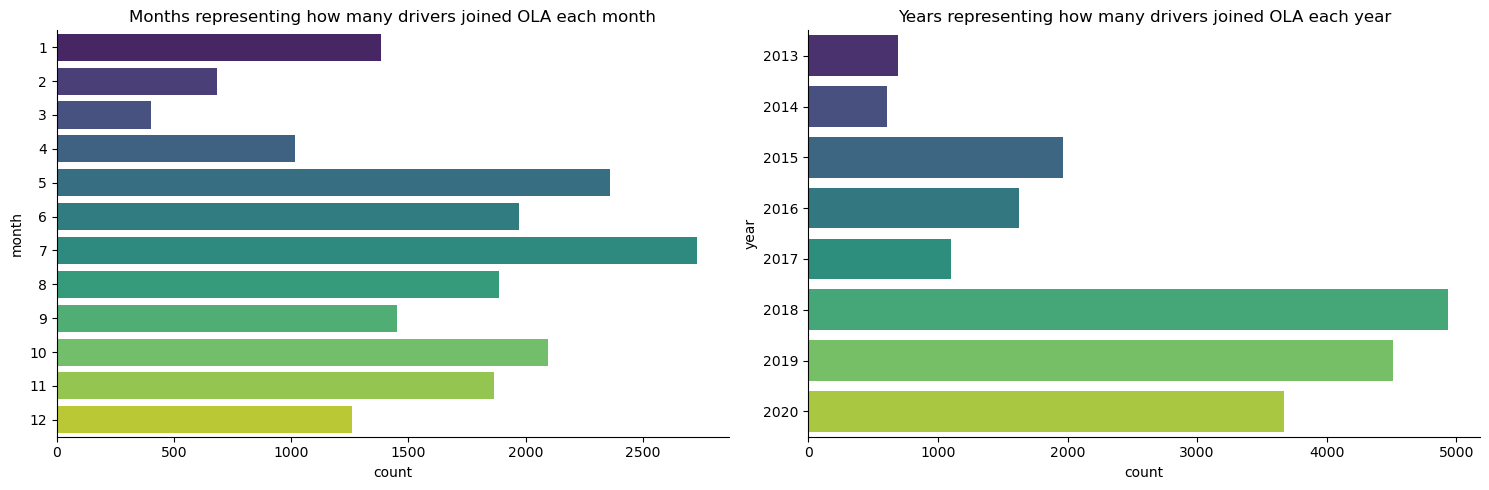

In [132]:
df['month'] = df['Dateofjoining'].dt.month
df['year'] = df['Dateofjoining'].dt.year

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot count of drivers joined each month
sns.countplot(y=df['month'], palette='viridis', ax=axes[0])
axes[0].set_title('Months representing how many drivers joined OLA each month')

# Plot count of drivers joined each year
sns.countplot(y=df['year'], palette='viridis', ax=axes[1])
axes[1].set_title('Years representing how many drivers joined OLA each year')

# Adjust layout
plt.tight_layout()
sns.despine()
plt.show()

- July attracted the highest influx of drivers over an eight-year period.
- February and March had the lowest number of drivers joining OLA.
- The recruitment of drivers experienced a surge of approximately 500% post-2017.

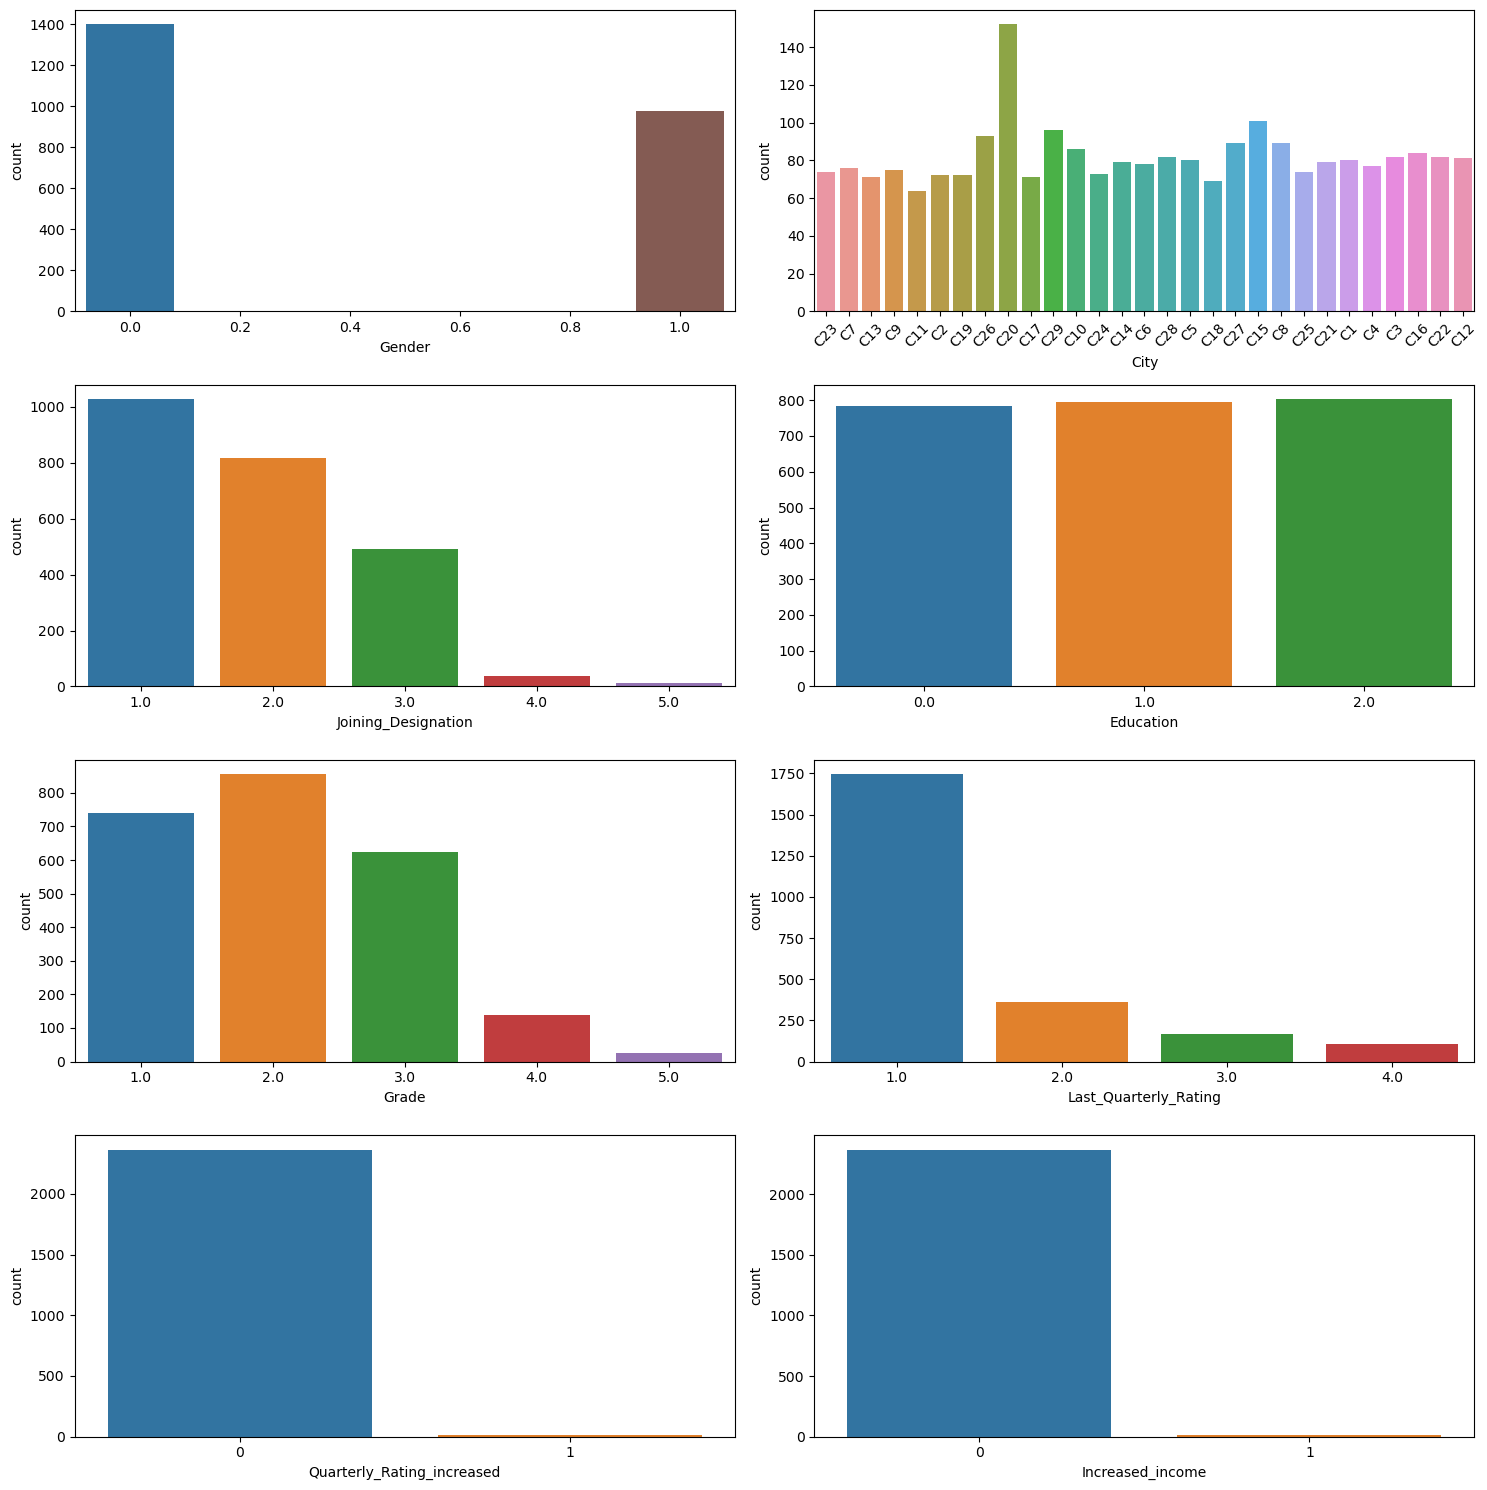

In [134]:
plt.figure(figsize=(15, 15))

plt.subplot(421)
sns.countplot(data=final_data, x="Gender")

plt.subplot(422)
sns.countplot(data=final_data, x="City")
plt.xticks(rotation=45)  # Corrected rotation parameter

plt.subplot(423)
sns.countplot(data=final_data, x="Joining_Designation")

plt.subplot(424)
sns.countplot(data=final_data, x="Education")

plt.subplot(425)
sns.countplot(data=final_data, x="Grade")

plt.subplot(426)
sns.countplot(data=final_data, x="Last_Quarterly_Rating")

plt.subplot(427)
sns.countplot(data=final_data, x="Quarterly_Rating_increased")

plt.subplot(428)
sns.countplot(data=final_data, x="Increased_income")

plt.tight_layout()
plt.show()

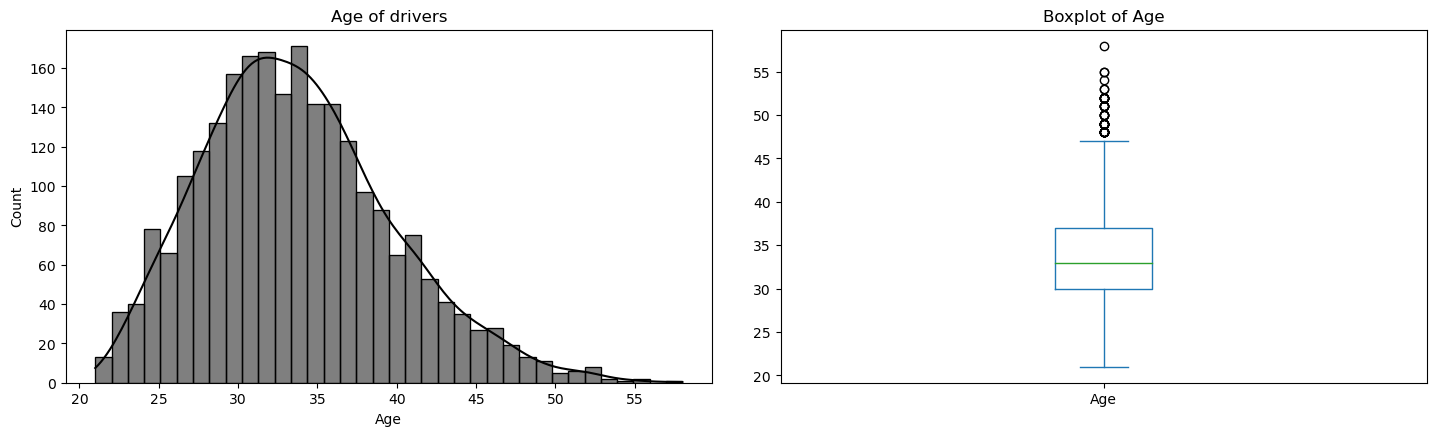

In [137]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.histplot(final_data['Age'],color='black', kde=True)
plt.title("Age of drivers")
plt.subplot(122)
final_data['Age'].plot.box(title='Boxplot of Age')
plt.tight_layout(pad=3)

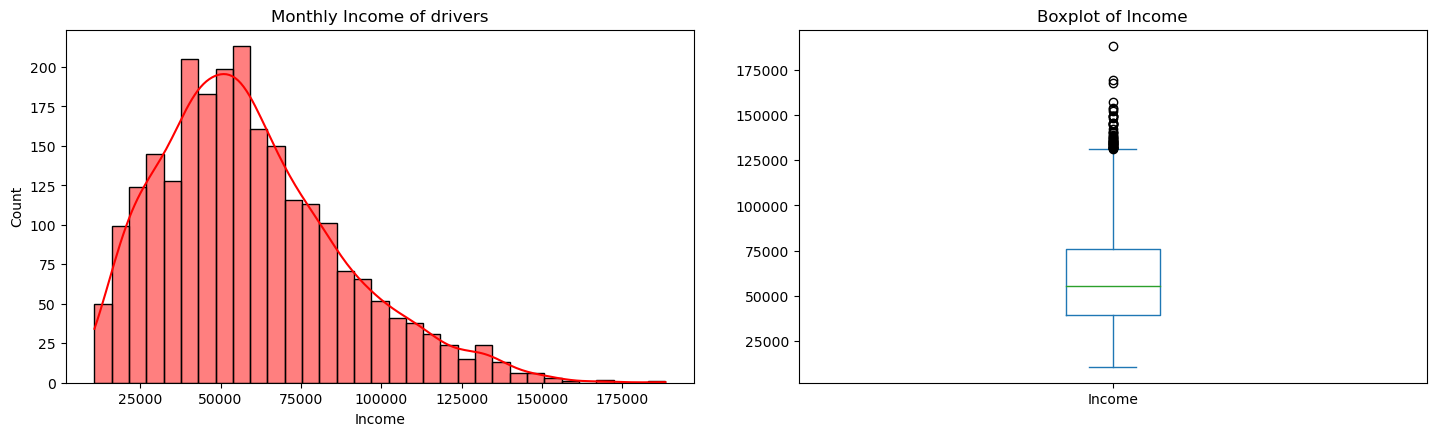

In [138]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.histplot(final_data['Income'],color='red', kde=True)
plt.title("Monthly Income of drivers")
plt.subplot(122)
final_data['Income'].plot.box(title='Boxplot of Income')
plt.tight_layout(pad=3)

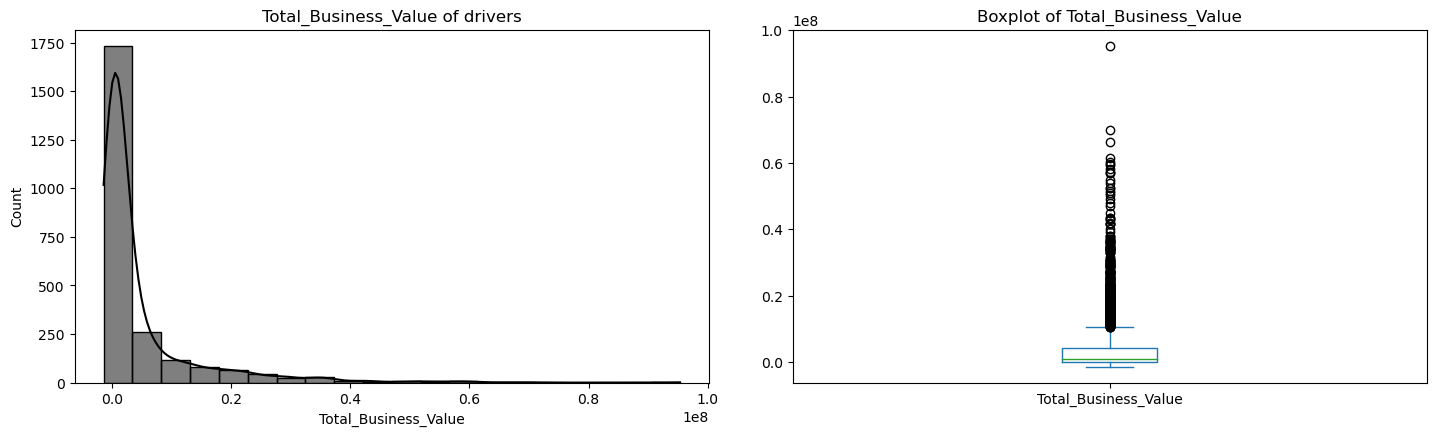

In [139]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.histplot(final_data['Total_Business_Value'],color='black', kde=True, bins=20)
plt.title("Total_Business_Value of drivers")
plt.subplot(122)
final_data['Total_Business_Value'].plot.box(title='Boxplot of Total_Business_Value')
plt.tight_layout(pad=3)

The right-skewed distribution of total business value suggests potential outliers within the data.

## Bi-Variate Analysis

<Axes: xlabel='Grade', ylabel='Income'>

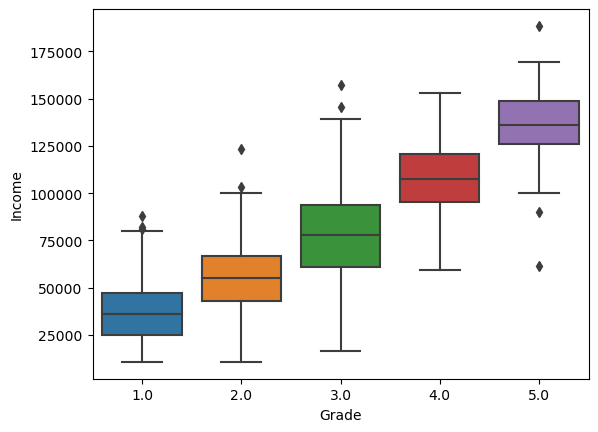

In [140]:
sns.boxplot(data=final_data, x='Grade', y='Income')

<Axes: xlabel='target', ylabel='Income'>

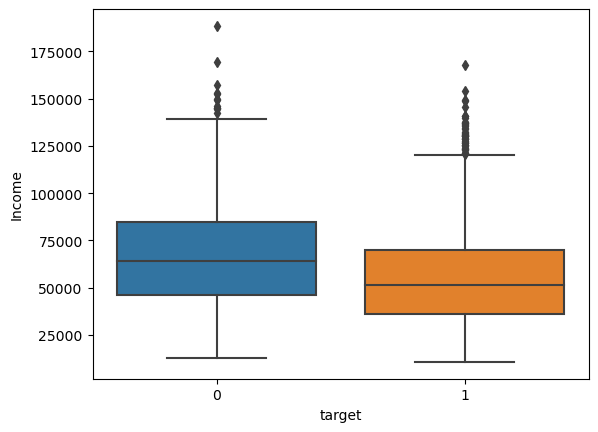

In [143]:
sns.boxplot(data=final_data, x='target', y='Income')

## Correlation

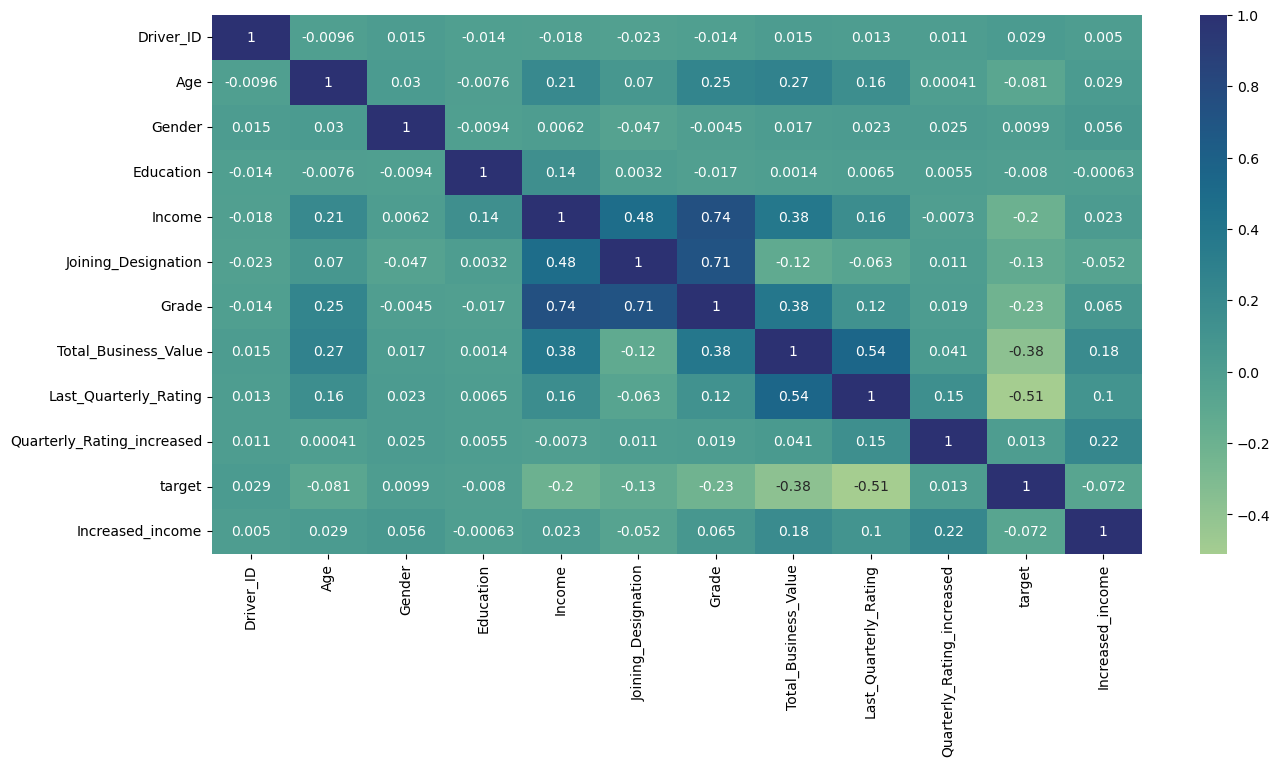

In [149]:
plt.figure(figsize=(15, 7))

sns.heatmap(final_data.corr(method="pearson"), annot=True, cmap="crest")
plt.show()

- There is a strong correlation between Income and Grade.
- There is a strong correlation between Joining Designation and Grade.

## Standardization

In [151]:
city_mapping = {
    'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5, 'C6': 6, 'C7': 7, 'C8': 8, 'C9': 9, 'C10': 10,
    'C11': 11, 'C12': 12, 'C13': 13, 'C14': 14, 'C15': 15, 'C16': 16, 'C17': 17, 'C18': 18, 'C19': 19, 'C20': 20,
    'C21': 21, 'C22': 22, 'C23': 23, 'C24': 24, 'C25': 25, 'C26': 26, 'C27': 27, 'C28': 28, 'C29': 29
}

# Map the cities using the dictionary
final_data['City'] = final_data['City'].map(city_mapping)

In [168]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = final_data.drop(["target"], axis = 1)
X_cols = X.columns
y = final_data["target"]

X = scaler.fit_transform(X)

## Train & Test Split

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1904, 12)
X_test Shape:  (477, 12)
y_train Shape:  (1904,)
y_test Shape:  (477,)


## Random Forest Classifier 

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, criterion='entropy', n_jobs=-1, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the train and validation set
pred_train = rf_classifier.predict(X_train)
pred_test = rf_classifier.predict(X_test)

print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

Train Accuracy: 0.9191176470588235
Validation Accuracy: 0.8071278825995807


In [171]:
rf_classifier.feature_importances_

array([0.11229204, 0.0939517 , 0.01777846, 0.09381134, 0.0279738 ,
       0.13449971, 0.04407517, 0.03938868, 0.20885085, 0.22409314,
       0.00301901, 0.0002661 ])

## Balancing Dataset using SMOTE

In [177]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 1289
Before OverSampling, counts of label '0': 615 

After OverSampling, the shape of train_X: (2578, 12)
After OverSampling, the shape of train_y: (2578,) 

After OverSampling, counts of label '1': 1289
After OverSampling, counts of label '0': 1289


## Ensemble Learning: Bagging

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'max_depth': 4, 'n_estimators': 150}
Best Score: 0.8036994927274436
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       150
           1       0.84      0.82      0.83       327

    accuracy                           0.77       477
   macro avg       0.73      0.74      0.73       477
weighted avg       0.77      0.77      0.77       477



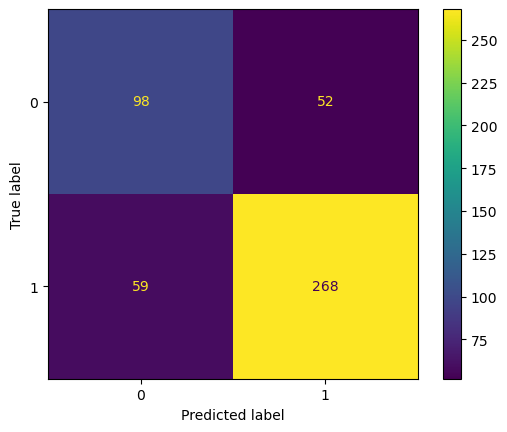

In [184]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define parameters for grid search
params = {"max_depth": [2, 3, 4], "n_estimators": [50, 100, 150, 200]}

# Initialize RandomForestClassifier with balanced subsample
random_forest = RandomForestClassifier(class_weight="balanced_subsample")

# Perform grid search
c = GridSearchCV(estimator=random_forest, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')
c.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", c.best_params_)
print("Best Score:", c.best_score_)

# Predict and print classification report
y_pred = c.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

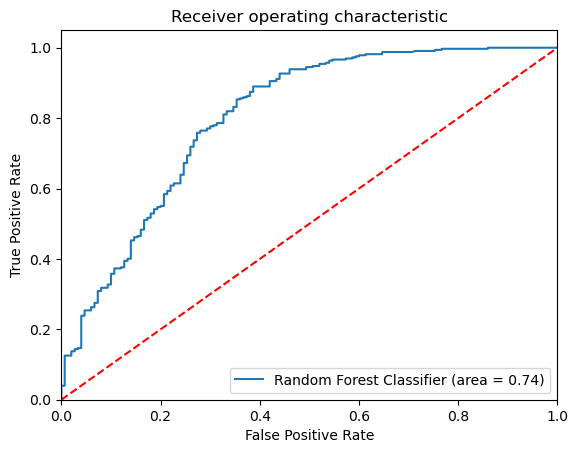

In [183]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds = roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Ensemble Learning: Boosting

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best Params:  {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}
Best Score:  0.8231344361119385
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       150
           1       0.84      0.86      0.85       327

    accuracy                           0.79       477
   macro avg       0.76      0.75      0.75       477
weighted avg       0.79      0.79      0.79       477



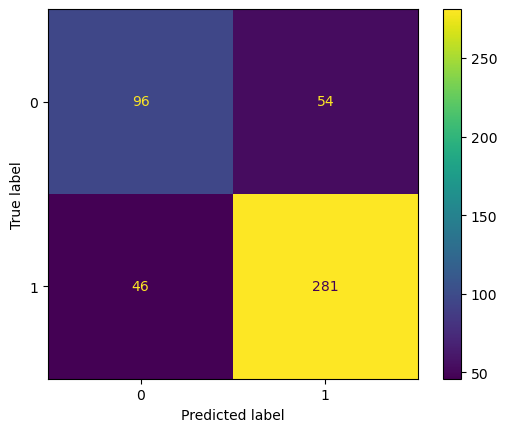

In [186]:
from sklearn.ensemble import GradientBoostingClassifier
params = {
    "max_depth": [2, 3, 4],
    "loss": ["log_loss", "exponential"],
    "subsample": [0.1, 0.2, 0.5, 0.8, 1],
    "learning_rate": [0.1, 0.2, 0.3],
    "n_estimators": [50,100,150,200]
}

gbdt = GradientBoostingClassifier()
c = GridSearchCV(estimator=gbdt, cv=3, n_jobs=-1, verbose=True, param_grid=params)

c.fit(X_train, y_train)
print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)

y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

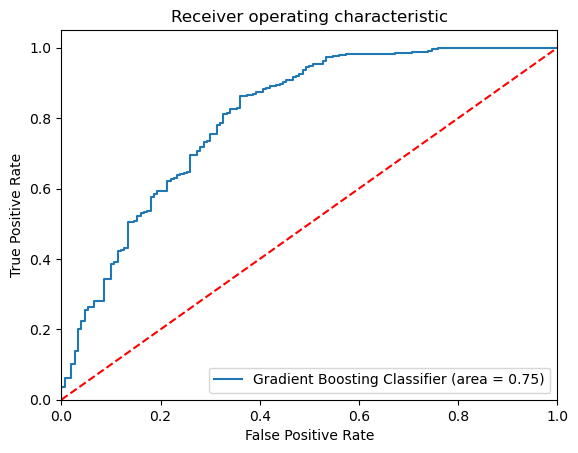

In [187]:
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label='Gradient Boosting Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## XGBoost Classifier

In [194]:
import xgboost as xgb
from xgboost import XGBClassifier

model = xgb.XGBClassifier(class_weight = "balanced")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("XGBoost Classifier Score: ", model.score(X_test, y_test))
print("\n", classification_report(y_test, y_pred))

XGBoost Classifier Score:  0.7442348008385744

               precision    recall  f1-score   support

           0       0.60      0.54      0.57       150
           1       0.80      0.84      0.82       327

    accuracy                           0.74       477
   macro avg       0.70      0.69      0.69       477
weighted avg       0.74      0.74      0.74       477



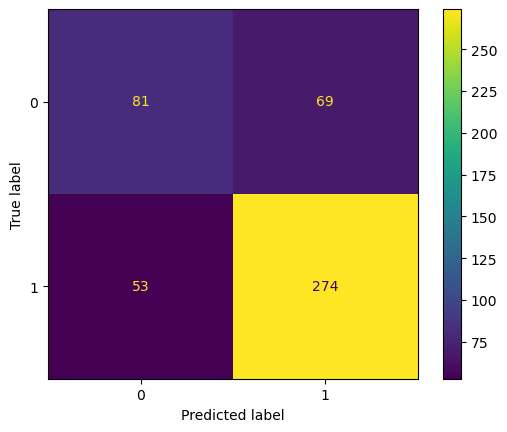

In [195]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

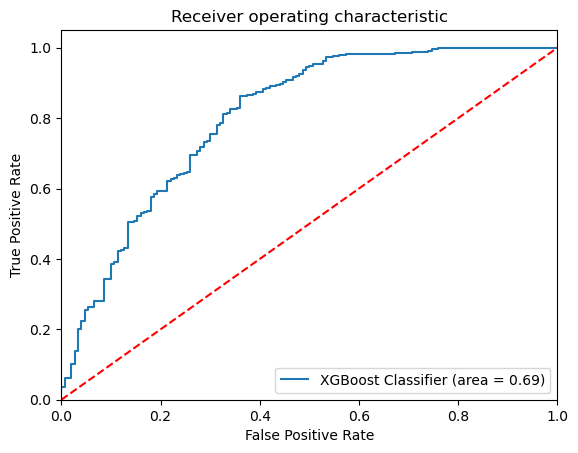

In [193]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label='XGBoost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

We find that the Random Forest model with SMOTE yields superior performance compared to other models, displaying higher recall and precision scores.

**For the Random Forest model:**
- Precision for predicting class 0 is 62%, and for class 1, it is 84%.
- Recall for actual class 0 instances is 65%, and for class 1, it is 82%.
- The area under the ROC-AUC curve is 0.74.

**Regarding the Gradient Boosting Classifier:**
- Precision for predicting class 0 is 68%, and for class 1, it is 84%.
- Recall for actual class 0 instances is 64%, and for class 1, it is 86%.
- The area under the ROC-AUC curve is 0.75.

**Regarding the XGBoost Classifier:**
- Precision for predicting class 0 is 60%, and for class 1, it is 80%.
- Recall for actual class 0 instances is 54%, and for class 1, it is 84%.
- The area under the ROC-AUC curve is 0.69.

# Actionable Insights and Recommendation

- There are 57% male employees and 43% female employees.
- Precision dropped after treatment of data imbalance and is performing better in Random Forest.
- The majority of the employees seem to be associated with city C20.
- Employees whose monthly salary has not increased are more likely to leave the organization. The company should engage with these drivers to help them earn more through bonuses and perks.
- The most important features are Last_Quarterly_Rating, Total_Business_Value, and Quarterly_Rating_Increased. The company should track these features as predictors.
-  Employees whose quarterly rating has increased are less likely to leave the organization. Implementing a reward system for customers who provide feedback and rate drivers could further encourage driver retention.
- We observe that the recall score for target 0 is not very high, possibly due to the small, unbalanced dataset. More data could address this issue.